<a href="https://colab.research.google.com/github/Nyraa1/MLProjectsRepo/blob/master/Thyroid_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
thyroid=pd.read_csv("/content/Thyroid_Diff.csv")
thyroid.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
thyroid.shape

(383, 17)

In [ ]:
thyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
#For better understanding
thyroid.rename(columns={'Hx Smoking': 'Smoking History','Hx Radiothreapy': 'Radiotherapy History','Thyroid Function': 'Thyroid status','Adenopathy':'lymph nodes'
,'Pathology':'Types of thyroid cancer','T':'Tumor','N':'Nodal','M':'Metastasis' },inplace=True)

In [ ]:
thyroid.head()

,Age,Gender,Smoking,Smoking History,Radiotherapy History,Thyroid status,Physical Examination,lymph nodes,Types of thyroid cancer,Focality,Risk,Tumor,Nodal,Metastasis,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
#checking the values in thyroid dataset
for i in thyroid.columns:
  print('**************************',i,'*****************************************')
  print()
  print(set(thyroid[i].to_list()))
  print()




************************** Age *****************************************

{15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 82}

************************** Gender *****************************************

{'F', 'M'}

************************** Smoking *****************************************

{'No', 'Yes'}

************************** Smoking History *****************************************

{'No', 'Yes'}

************************** Radiotherapy History *****************************************

{'No', 'Yes'}

************************** Thyroid status *****************************************

{'Subclinical Hypothyroidism', 'Euthyroid', 'Clinical Hyperthyroidism', 'Clinical Hypothyroidism', 'Subclinical Hyperthyroidism'}

************************** Physical Examination ***********

In [ ]:
thyroid['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

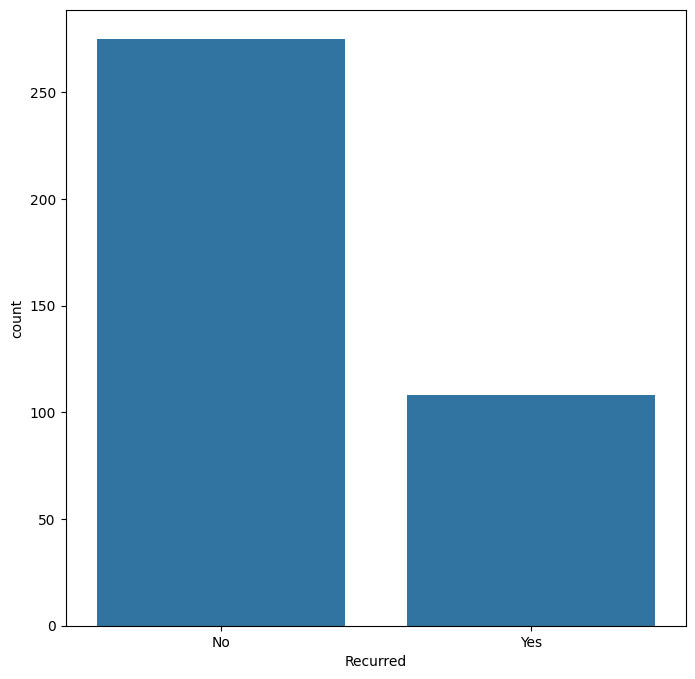

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Recurred',data=thyroid)
plt.ylabel('count')
plt.xlabel('Recurred')
plt.show()

In [ ]:
thyroid.isnull().sum()/len(thyroid)*100

Age                        0.0
Gender                     0.0
Smoking                    0.0
Smoking History            0.0
Radiotherapy History       0.0
Thyroid status             0.0
Physical Examination       0.0
lymph nodes                0.0
Types of thyroid cancer    0.0
Focality                   0.0
Risk                       0.0
Tumor                      0.0
Nodal                      0.0
Metastasis                 0.0
Stage                      0.0
Response                   0.0
Recurred                   0.0
dtype: float64

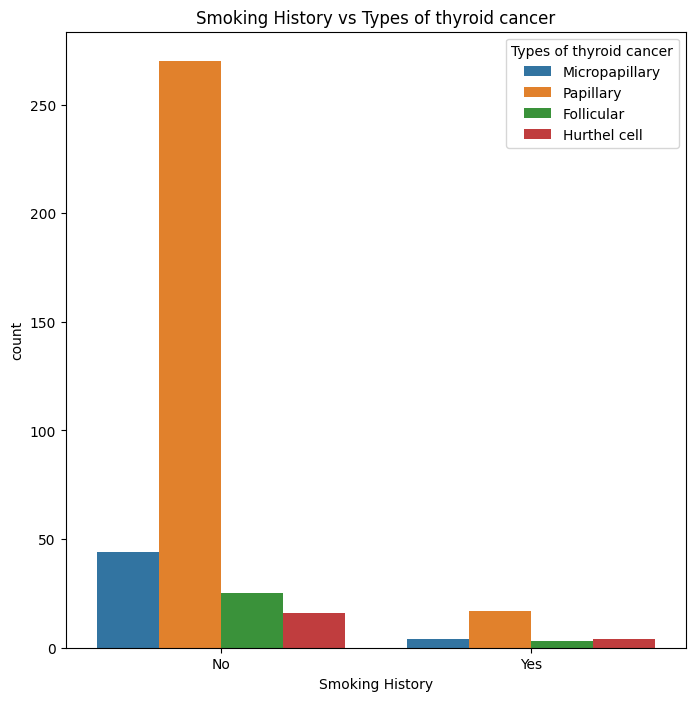

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Smoking History',hue='Types of thyroid cancer',data=thyroid)
plt.title("Smoking History vs Types of thyroid cancer")
plt.xlabel('Smoking History')
plt.ylabel('count')
plt.show()

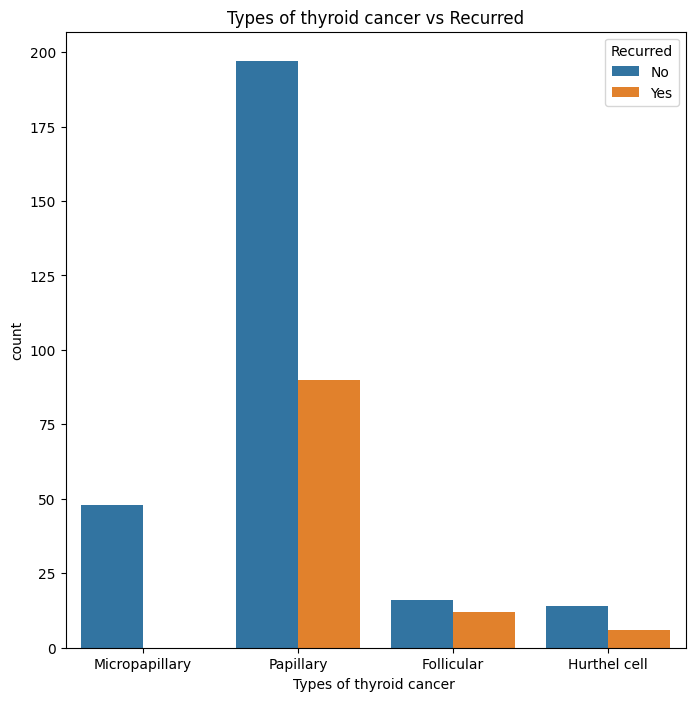

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Types of thyroid cancer',hue='Recurred',data=thyroid)
plt.title("Types of thyroid cancer vs Recurred")
plt.xlabel('Types of thyroid cancer ')
plt.ylabel('count')
plt.show()

In [ ]:
thyroid.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [ ]:
thyroid.columns

Index(['Age', 'Gender', 'Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid status', 'Physical Examination', 'lymph nodes',
       'Types of thyroid cancer', 'Focality', 'Risk', 'Tumor', 'Nodal',
       'Metastasis', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
thyroid.drop(['Gender'],axis=1,inplace=True)

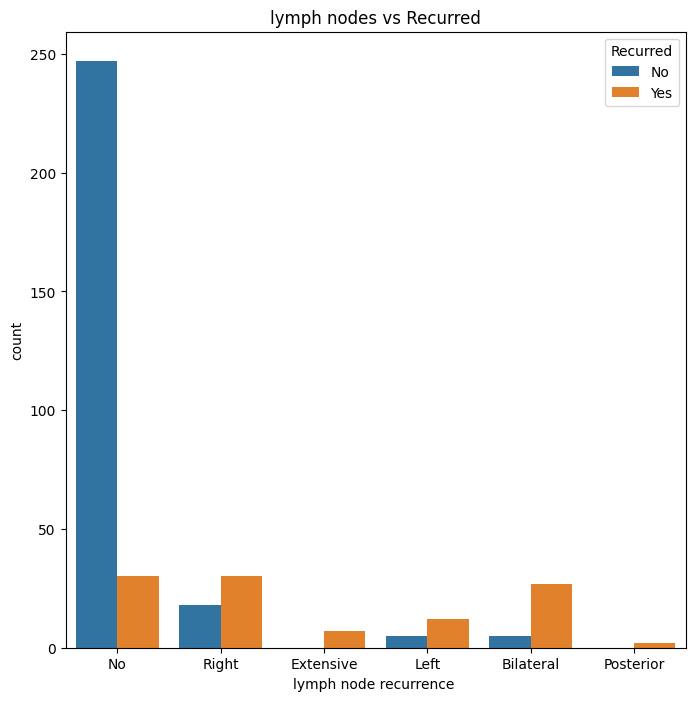

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='lymph nodes',hue='Recurred',data=thyroid)
plt.title("lymph nodes vs Recurred")
plt.xlabel('lymph node recurrence ')
plt.ylabel('count')
plt.show()

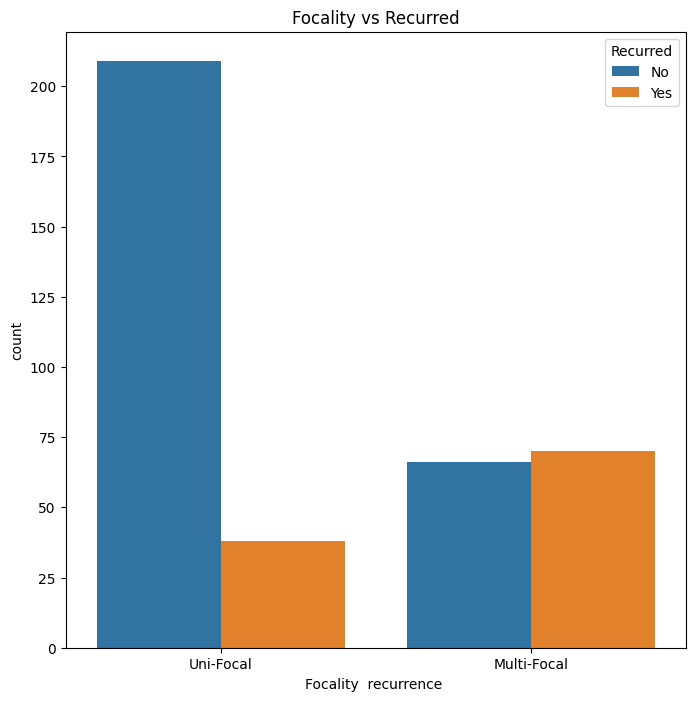

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Focality',hue='Recurred',data=thyroid)
plt.title("Focality vs Recurred")
plt.xlabel('Focality  recurrence ')
plt.ylabel('count')
plt.show()

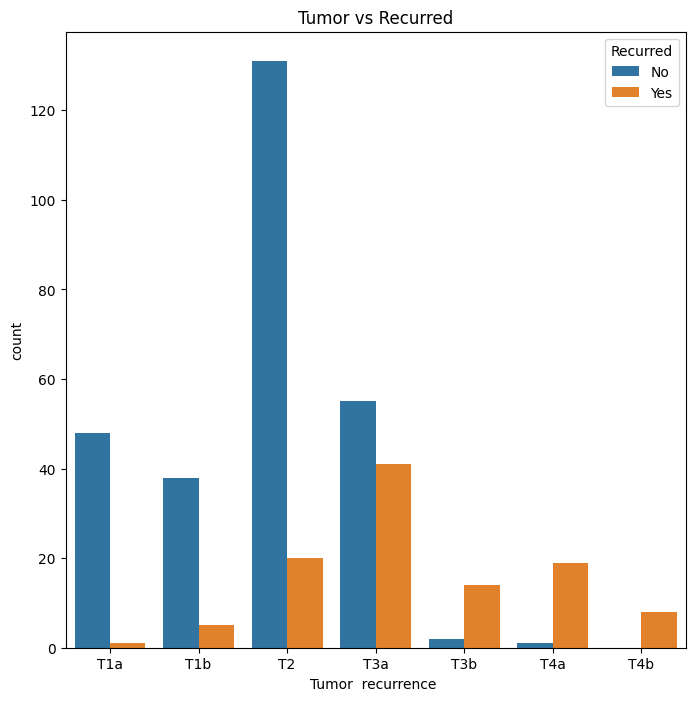

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Tumor',hue='Recurred',data=thyroid)
plt.title("Tumor vs Recurred")
plt.xlabel('Tumor  recurrence ')
plt.ylabel('count')
plt.show()

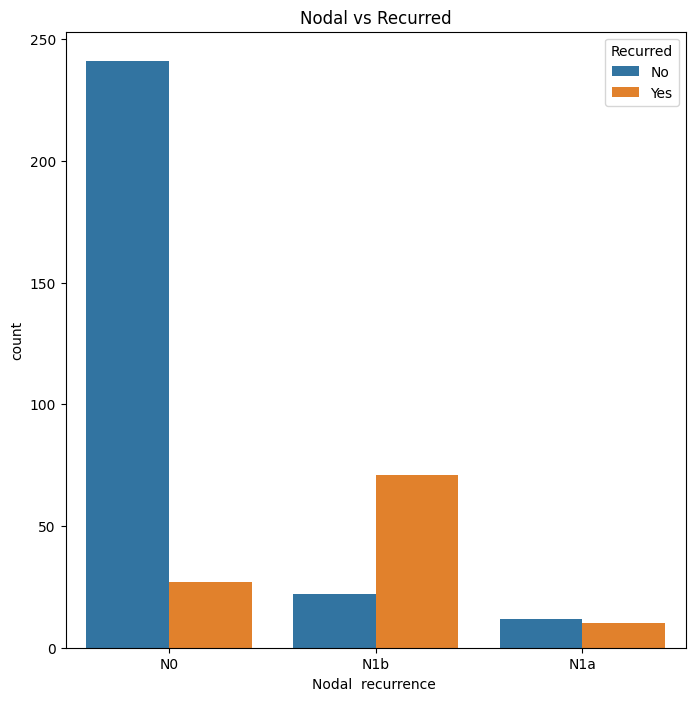

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Nodal',hue='Recurred',data=thyroid)
plt.title("Nodal vs Recurred")
plt.xlabel('Nodal  recurrence ')
plt.ylabel('count')
plt.show()

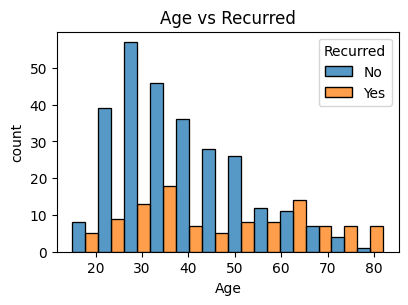

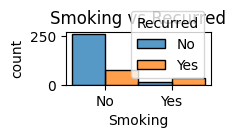

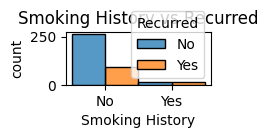

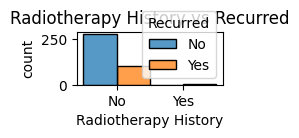

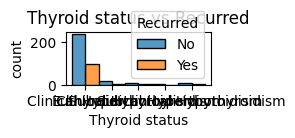

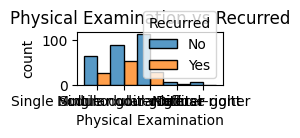

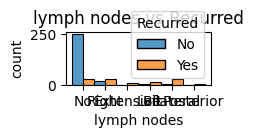

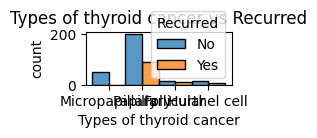

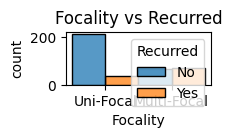

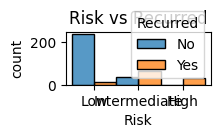

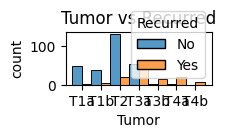

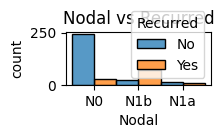

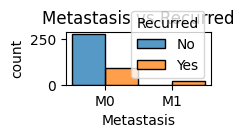

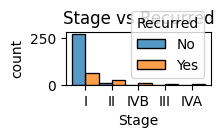

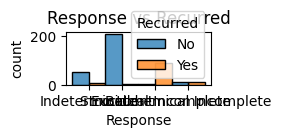

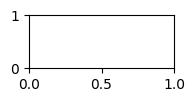

In [ ]:
plt.figure(figsize=(15,20))
for i in thyroid.columns:
  plt.subplot(6,3,1)
  if i!='Recurred':

    sns.histplot(x=thyroid[i],hue=thyroid['Recurred'],multiple='dodge')
    plt.xlabel(i)
    plt.title(f"{i} vs Recurred")
    plt.ylabel('count')
    plt.show()

In [ ]:
cat_col=['Smoking', 'Smoking History', 'Radiotherapy History',
       'Thyroid status', 'Physical Examination', 'lymph nodes',
       'Types of thyroid cancer', 'Focality', 'Risk', 'Tumor', 'Nodal',
       'Metastasis', 'Stage', 'Response']
for i in cat_col:
  thyroid=pd.get_dummies(thyroid , columns=[i])

thyroid.head()

,Age,Recurred,Smoking_No,Smoking_Yes,Smoking History_No,Smoking History_Yes,Radiotherapy History_No,Radiotherapy History_Yes,Thyroid status_Clinical Hyperthyroidism,Thyroid status_Clinical Hypothyroidism,...,Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,No,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,34,No,True,False,False,True,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2,30,No,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,62,No,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,62,No,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
thyroid=thyroid.replace({True:1,False:0})
thyroid.head(5)

,Age,Recurred,Smoking_No,Smoking_Yes,Smoking History_No,Smoking History_Yes,Radiotherapy History_No,Radiotherapy History_Yes,Thyroid status_Clinical Hyperthyroidism,Thyroid status_Clinical Hypothyroidism,...,Metastasis_M1,Stage_I,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete
0,27,No,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,34,No,1,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,30,No,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,62,No,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,62,No,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
for i in thyroid.columns:
  print('************************',i,'***************')
  print()
  print(set(thyroid[i].to_list()))

************************ Age ***************

{15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 78, 79, 80, 81, 82}
************************ Recurred ***************

{'No', 'Yes'}
************************ Smoking_No ***************

{0, 1}
************************ Smoking_Yes ***************

{0, 1}
************************ Smoking History_No ***************

{0, 1}
************************ Smoking History_Yes ***************

{0, 1}
************************ Radiotherapy History_No ***************

{0, 1}
************************ Radiotherapy History_Yes ***************

{0, 1}
************************ Thyroid status_Clinical Hyperthyroidism ***************

{0, 1}
************************ Thyroid status_Clinical Hypothyroidism ***************

{0, 1}
************************ Thyroid status_Euthyr

In [ ]:
#splitting into independent feature and dependent feature
x=thyroid.drop(['Recurred'],axis=1)
y=thyroid['Recurred']

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=121)

In [ ]:
x_train.shape

(306, 53)

In [ ]:
x_test.shape

(77, 53)

In [ ]:
y_train.value_counts()

Recurred
No     223
Yes     83
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train_sm,y_train_sm=sm.fit_resample(x_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train_sm,y_train_sm)
y_train_pred=lr.predict(x_train_sm)
y_test_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
print(accuracy_score(y_train_sm,y_train_pred))
print(accuracy_score(y_test,y_test_pred))

0.984304932735426
0.935064935064935


In [ ]:
#classification report
print("Classification report for Train:")
print(classification_report(y_train_sm,y_train_pred))
print("Classification report for Test:")
print(classification_report(y_test,y_test_pred))

Classification report for Train:
              precision    recall  f1-score   support

          No       0.98      0.99      0.98       223
         Yes       0.99      0.98      0.98       223

    accuracy                           0.98       446
   macro avg       0.98      0.98      0.98       446
weighted avg       0.98      0.98      0.98       446

Classification report for Test:
              precision    recall  f1-score   support

          No       0.91      1.00      0.95        52
         Yes       1.00      0.80      0.89        25

    accuracy                           0.94        77
   macro avg       0.96      0.90      0.92        77
weighted avg       0.94      0.94      0.93        77



In [ ]:
#Confusion report
print("Confusion report for Train:")
print(confusion_matrix(y_train_sm,y_train_pred))
print("confusion report for Test:")
print(confusion_matrix(y_test,y_test_pred))

Confusion report for Train:
[[221   2]
 [  5 218]]
confusion report for Test:
[[52  0]
 [ 5 20]]
